# First tests of inference methods on the epidemiology problem

In [16]:
import numpy as np
import corner
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Data

In [2]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
methods = ['maf', 'scandal']
method_labels = ['MAF', 'SCANDAL']

In [8]:
expected_log_likelihoods = []
log_likelihood_mses = []
roc_aucs = []

log_likelihood_reference = np.load(
    '../data/results/epidemiology/scandal/log_p_hat_test.npy'
)
print(log_likelihood_reference)

for method in methods:
    log_likelihood_mses_this_method = []
    roc_aucs_this_method = []
    expected_log_likelihoods_this_method = []
    
    for sample_size in sample_sizes:
        log_likelihood = np.load('../data/results/epidemiology/' + method
                                 + '/log_p_hat_test_trainingsamplesize_'
                                 + str(sample_size) + '.npy')
        print(sample_size, np.mean(log_likelihood))
        roc_auc = np.load('../data/results/epidemiology/' + method
                          + '/roc_auc_surrogate_vs_simulator_trainingsamplesize_' + str(sample_size)
                          + '.npy')
        
        try:
            mse = mean_squared_error(log_likelihood_reference, log_likelihood)
        except ValueError:
            mse = np.nan
        expected_log_likelihood = 1. / log_likelihood.shape[0] * np.sum(log_likelihood)
        
        expected_log_likelihoods_this_method.append(expected_log_likelihood)
        roc_aucs_this_method.append(roc_auc)
        log_likelihood_mses_this_method.append(mse)
        
    log_likelihood_mses.append(log_likelihood_mses_this_method)
    roc_aucs.append(roc_aucs_this_method)
    expected_log_likelihoods.append(expected_log_likelihoods_this_method)
    
expected_log_likelihoods = np.array(expected_log_likelihoods)
log_likelihood_mses = np.array(log_likelihood_mses)
roc_aucs = np.array(roc_aucs)


[ 3.32446667  3.75804364 -2.070672   ... -3.96119413  2.56161756
  2.80284189]
100 -426.84100841216247
200 -1.4987420141673093
500 1.4774272515214864
1000 1.7677263516124702
2000 1.4063019395285028
5000 1.3798495061454654
10000 0.8672574559376303
20000 1.5075486752211753
50000 1.5984757909457321
100 -61.01029011083062
200 0.07031930261423143
500 0.8238798635215614
1000 1.2719017333208373
2000 1.0469497143376816
5000 1.1714651811715036
10000 0.8474699199158746
20000 1.6665590662656082
50000 1.396468011751386


## Plot sample size vs performance

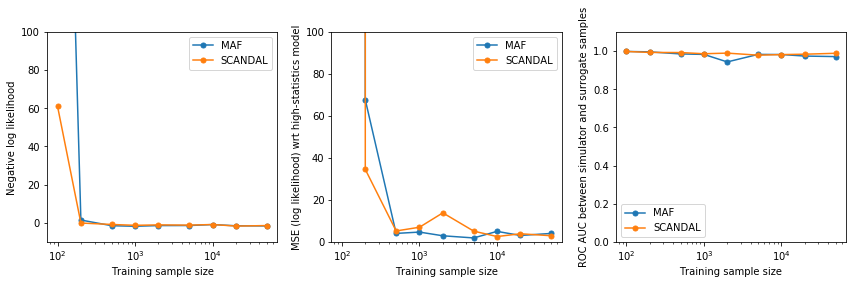

In [13]:
fig = plt.figure(figsize=(12,4))



ax = plt.subplot(1,3,1)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, - expected_log_likelihoods[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('Negative log likelihood')
    plt.ylim(-10.,100.)
    ax.set_xscale("log", nonposx='clip')



ax = plt.subplot(1,3,2)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, log_likelihood_mses[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('MSE (log likelihood) wrt high-statistics model')
    plt.ylim(0.,100.)
    ax.set_xscale("log", nonposx='clip')



ax = plt.subplot(1,3,3)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, roc_aucs[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('ROC AUC between simulator and surrogate samples')
    plt.ylim(0.,1.1)
    ax.set_xscale("log", nonposx='clip')
    
    

plt.tight_layout()
plt.show()


## Original vs simulated samples

In [15]:
x_simulator = np.load('../data/samples/epidemiology/x_test_singletheta.npy')
x_maf = np.load('../data/results/epidemiology/maf/samples_from_p_hat.npy')

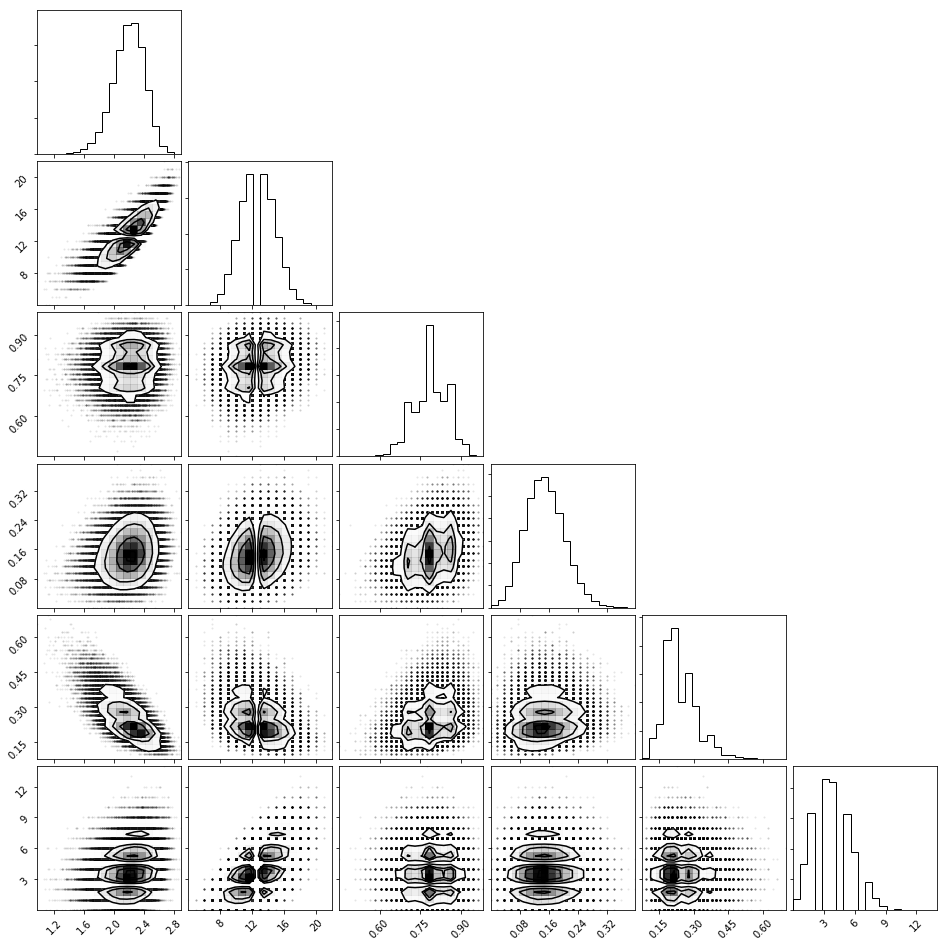

In [19]:
_ = corner.corner(x_simulator)

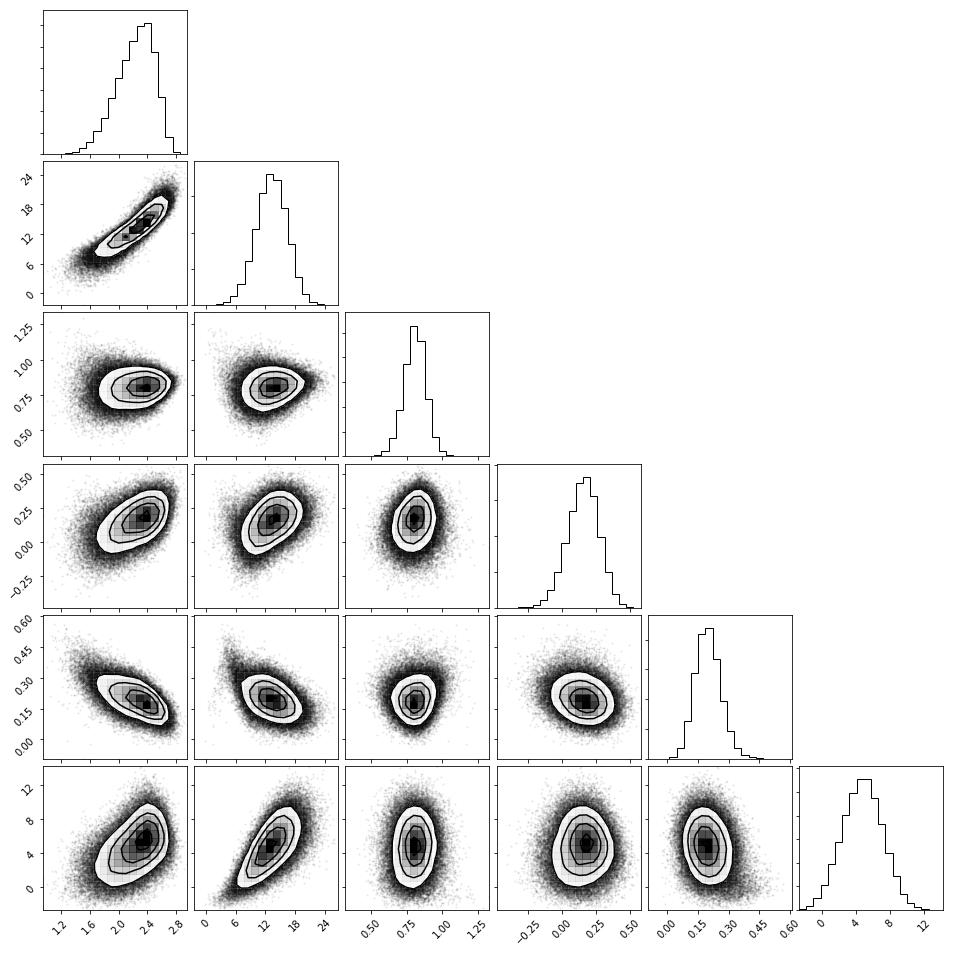

In [20]:
_ = corner.corner(x_maf)